In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

#### Load Dataset

In [2]:
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Standardize the Data

#### Why Standardisation

-  PCA is affected by the scale of variables.
-  If features are on different scales, PCA will give more importance to variables with higher variance (due to larger units).
-  Standardization ensures each feature contributes equally.

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

#### Apply PCA

In [5]:
pca = PCA()
pca_data = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_data, columns=[f"PC{i+1}" for i in range(len(df.columns))])

#### Scatter Plot: PC1 vs PC2

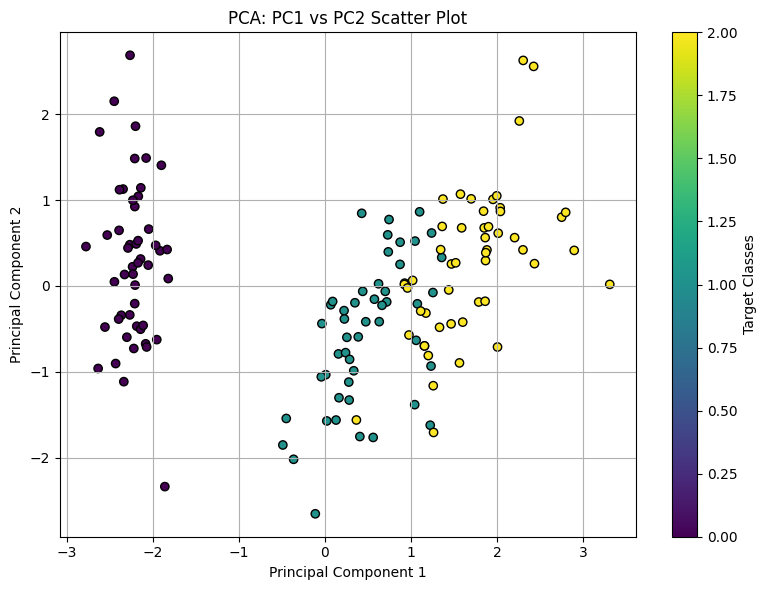

In [6]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=data.target, cmap='viridis', edgecolor='k')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: PC1 vs PC2 Scatter Plot")
plt.colorbar(label='Target Classes')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Most Important Variables for PC1 and PC2

In [7]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(len(df.columns))], index=df.columns)

# Absolute values of loadings show importance
pc1_important = loadings["PC1"].abs().sort_values(ascending=False)
pc2_important = loadings["PC2"].abs().sort_values(ascending=False)

print("\nMost important variables for PC1:")
print(pc1_important)

print("\nMost important variables for PC2:")
print(pc2_important)


Most important variables for PC1:
petal length (cm)    0.580413
petal width (cm)     0.564857
sepal length (cm)    0.521066
sepal width (cm)     0.269347
Name: PC1, dtype: float64

Most important variables for PC2:
sepal width (cm)     0.923296
sepal length (cm)    0.377418
petal width (cm)     0.066942
petal length (cm)    0.024492
Name: PC2, dtype: float64


####  Variance Explained by PC1 and PC2

In [8]:
explained_variance = pca.explained_variance_ratio_
print(f"\nVariance explained by PC1: {explained_variance[0]:.2f}")
print(f"Variance explained by PC2: {explained_variance[1]:.2f}")
print(f"Combined variance by PC1 and PC2: {explained_variance[0] + explained_variance[1]:.2f}")


Variance explained by PC1: 0.73
Variance explained by PC2: 0.23
Combined variance by PC1 and PC2: 0.96


#### How Many PCs Explain >80% Variance

In [9]:
cumulative_variance = np.cumsum(explained_variance)
num_components_80 = np.argmax(cumulative_variance >= 0.80) + 1

print(f"\nNumber of Principal Components needed to explain >80% variance: {num_components_80}")


Number of Principal Components needed to explain >80% variance: 2
